In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

In [2]:
aal = pd.read_csv("PEP.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [3]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,CMO_252,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252
0,2010-01-04,43.587127,43.822195,43.195349,43.622746,6585900,0.0,0,0.723694,0.747318,...,NaN,0.626846,0.516434,1.183864,0.626846,0.671402,1.539110,0.626846,0.847520,1.942840
1,2010-01-05,43.451787,44.235342,43.380555,44.149864,8886000,0.0,0,1.208357,0.691148,...,4.784259,0.854787,0.511448,1.158437,0.854787,0.676408,1.532073,0.854787,0.848531,1.921933
2,2010-01-06,44.156979,44.498894,43.615611,43.708214,9998000,0.0,0,-1.000344,0.664862,...,5.516727,0.883283,0.510737,1.168514,0.883283,0.676075,1.546792,0.883283,0.846752,1.937284
3,2010-01-07,43.701101,43.722473,43.116995,43.430420,10792000,0.0,0,-0.635564,0.707241,...,5.012792,0.605477,0.532819,1.226833,0.605477,0.675227,1.554732,0.605477,0.843625,1.942476
4,2010-01-08,43.280816,43.323557,42.931779,43.287941,8674700,0.0,0,-0.328063,0.717515,...,5.988949,0.498641,0.538519,1.244039,0.498641,0.670904,1.549863,0.498641,0.842128,1.945409


In [4]:
aal['Hl_pct'] = 100*(aal['High']-aal['Low'])/aal['Close']
aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Hl_pct,pct_change
0,2010-01-04,43.622746,6585900,0.0,0,0.723694,0.747318,1.035507,1.444018,1.604342,...,0.516434,1.183864,0.626846,0.671402,1.539110,0.626846,0.847520,1.942840,1.436971,0.081718
1,2010-01-05,44.149864,8886000,0.0,0,1.208357,0.691148,1.046315,1.445106,0.311568,...,0.511448,1.158437,0.854787,0.676408,1.532073,0.854787,0.848531,1.921933,1.936104,1.606557
2,2010-01-06,43.708214,9998000,0.0,0,-1.000344,0.664862,1.036433,1.446648,0.054552,...,0.510737,1.168514,0.883283,0.676075,1.546792,0.883283,0.846752,1.937284,2.020863,-1.016295
3,2010-01-07,43.430420,10792000,0.0,0,-0.635564,0.707241,1.041445,1.432110,0.400120,...,0.532819,1.226833,0.605477,0.675227,1.554732,0.605477,0.843625,1.942476,1.394132,-0.619392
4,2010-01-08,43.287941,8674700,0.0,0,-0.328063,0.717515,1.033422,1.430121,0.288173,...,0.538519,1.244039,0.498641,0.670904,1.549863,0.498641,0.842128,1.945409,0.905051,0.016462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2021-07-02,148.910004,3835500,0.0,0,0.479087,0.622969,0.765299,1.008094,0.750008,...,1.392999,0.935464,1.580002,1.779917,1.195297,1.580002,2.236027,1.501597,0.819288,0.006722
2895,2021-07-06,149.130005,4313800,0.0,0,0.147741,0.592917,0.765291,1.007957,-0.202186,...,1.425998,0.956211,1.649994,1.778198,1.192381,1.649994,2.236256,1.499535,1.106413,0.040248
2896,2021-07-07,149.789993,4225000,0.0,0,0.442559,0.598705,0.750852,1.008204,0.335898,...,1.474997,0.984710,1.699997,1.756852,1.172877,1.699997,2.233563,1.491129,1.134920,0.334919
2897,2021-07-08,149.860001,4216000,0.0,0,0.046737,0.289848,0.722829,1.007847,-0.856102,...,1.427997,0.952887,1.479996,1.717380,1.145990,1.479996,2.233541,1.490418,0.987586,0.294474


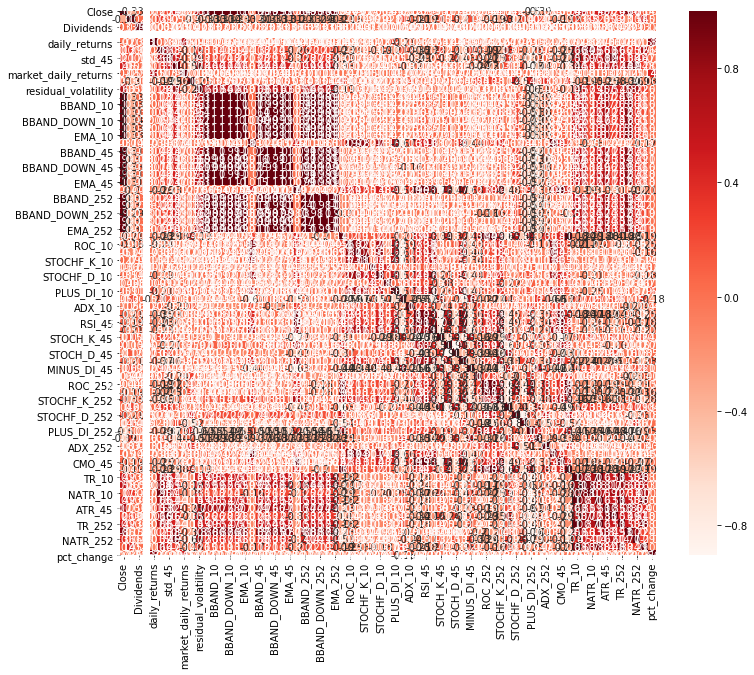

In [5]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [7]:
aal_df = aal1[rel_feat["sel_col"]]
aal_df['Date']=aal1['Date']

C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
print(len(aal1.columns), len(rel_feat))

72 31


In [9]:
aal_df.columns

Index(['Close', 'Volume', 'std_45', 'std_252', 'residual_volatility',
       'Typical Price', 'BBAND_10', 'BBAND_UP_10', 'BBAND_DOWN_10', 'SMA_10',
       'EMA_10', 'BBAND_45', 'BBAND_UP_45', 'BBAND_DOWN_45', 'SMA_45',
       'EMA_45', 'BBAND_252', 'BBAND_UP_252', 'BBAND_DOWN_252', 'SMA_252',
       'EMA_252', 'PLUS_DI_252', 'MINUS_DI_252', 'TR_10', 'ATR_10', 'TR_45',
       'ATR_45', 'NATR_45', 'TR_252', 'ATR_252', 'NATR_252', 'Date'],
      dtype='object')

In [10]:
aal_close_px = aal_df['Close']

In [11]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


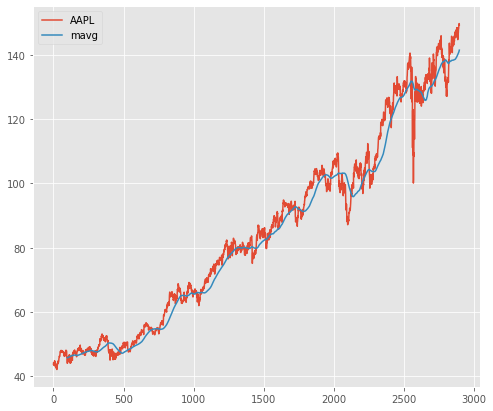

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

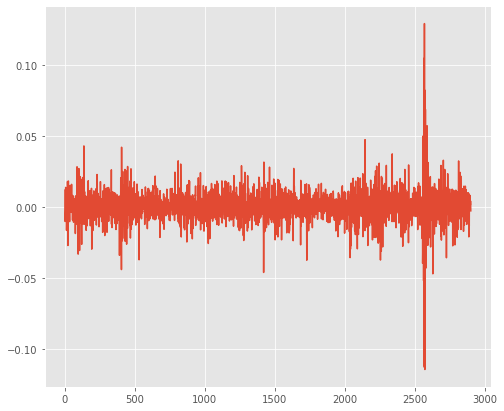

In [13]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [14]:
aal_df['prev_day'] = aal_df['Close'].shift(1)


C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
aal_df

,Close,Volume,std_45,std_252,residual_volatility,Typical Price,BBAND_10,BBAND_UP_10,BBAND_DOWN_10,SMA_10,...,TR_10,ATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Date,prev_day
0,43.622746,6585900,1.035507,1.444018,0.870682,43.451783,43.297921,44.061352,42.534491,43.297921,...,0.626846,0.516434,0.626846,0.671402,1.539110,0.626846,0.847520,1.942840,2010-01-04,NaN
1,44.149864,8886000,1.046315,1.445106,0.872842,43.546763,43.476003,44.093251,42.858754,43.476003,...,0.854787,0.511448,0.854787,0.676408,1.532073,0.854787,0.848531,1.921933,2010-01-05,43.622746
2,43.708214,9998000,1.036433,1.446648,0.875479,43.921921,43.538687,44.102852,42.974521,43.538687,...,0.883283,0.510737,0.883283,0.676075,1.546792,0.883283,0.846752,1.937284,2010-01-06,44.149864
3,43.430420,10792000,1.041445,1.432110,0.875451,43.940906,43.562907,44.078944,43.046870,43.562907,...,0.605477,0.532819,0.605477,0.675227,1.554732,0.605477,0.843625,1.942476,2010-01-07,43.708214
4,43.287941,8674700,1.033422,1.430121,0.871686,43.423296,43.569316,44.067935,43.070698,43.569316,...,0.498641,0.538519,0.498641,0.670904,1.549863,0.498641,0.842128,1.945409,2010-01-08,43.430420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,148.910004,3835500,0.765299,1.008094,0.654754,148.406667,146.953000,149.395366,144.510634,146.953000,...,1.580002,1.392999,1.580002,1.779917,1.195297,1.580002,2.236027,1.501597,2021-07-02,148.199997
2895,149.130005,4313800,0.765291,1.007957,0.655857,149.083333,147.210001,149.986569,144.433432,147.210001,...,1.649994,1.425998,1.649994,1.778198,1.192381,1.649994,2.236256,1.499535,2021-07-06,148.910004
2896,149.789993,4225000,0.750852,1.008204,0.655482,148.773336,147.511000,150.702060,144.319940,147.511000,...,1.699997,1.474997,1.699997,1.756852,1.172877,1.699997,2.233563,1.491129,2021-07-07,149.130005
2897,149.860001,4216000,0.722829,1.007847,0.655732,149.829997,148.012000,150.905545,145.118454,148.012000,...,1.479996,1.427997,1.479996,1.717380,1.145990,1.479996,2.233541,1.490418,2021-07-08,149.789993


In [16]:
aal_df = aal_df.set_index("Date")

In [17]:
aal_df.index = pd.to_datetime(aal_df.index)
aal_df.index[0]

Timestamp('2010-01-04 00:00:00')

In [18]:
# training test split
key = pd.Timestamp(2016, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [19]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [20]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [21]:
# model generation
xtrain.fillna(value=-99999, inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [23]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [24]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.9665265560139564
The quadratic regression 2 confidence is  0.8732403066691239
The quadratic regression 3 confidence is  -15.486494227308931
The knn regression confidence is  -10.66404813314777


In [25]:
forecast_set = clfreg.predict(xtest)
aal_df['Forecast'] = np.nan

In [26]:
forecast_set
aal_df['Forecast']

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2021-07-02   NaN
2021-07-06   NaN
2021-07-07   NaN
2021-07-08   NaN
2021-07-09   NaN
Name: Forecast, Length: 2899, dtype: float64

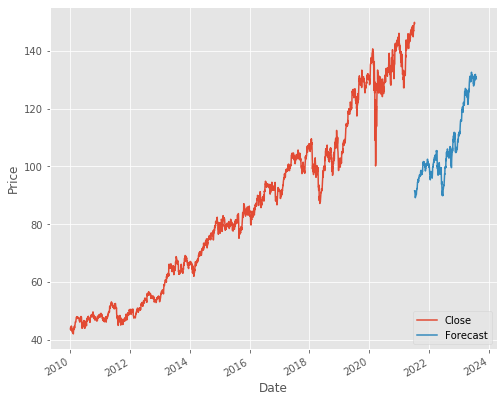

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-07-30    130.983744
2023-07-31    130.438130
2023-08-01    130.495619
2023-08-02    130.473318
2023-08-03    130.320775
Name: Forecast, Length: 3654, dtype: float64

In [27]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = aal_df.iloc[-1].name
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    aal_df.loc[next_date] = [np.nan for _ in range(len(aal_df.columns)-1)]+[i]
aal_df['Close'].plot()
aal_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [28]:
print(next_unix)

2023-08-04 00:00:00


In [29]:
print(clfreg.coef_)

[-1.41502927e-02  4.11204424e-01 -1.04065472e+00 -1.28857916e+00
 -1.73613179e-02  5.02225632e-01  7.03249410e-01 -1.73613179e-02
  2.98417780e-01 -3.58340355e-02 -1.23522331e+01 -1.51202247e-02
  3.09711184e-03  3.09711184e-03 -1.59206867e+00  1.44627761e-01
 -1.60901567e-02  4.20282592e-02  3.25747243e-02 -3.16221557e-09
 -3.24925060e-01  2.90304716e-01 -8.35236071e-06  1.95851336e+01
  4.55383036e+00 -1.73613179e-02  9.19341001e-01  9.32930677e-02
 -1.51202247e-02  2.94361248e-01  2.94361248e-01]


In [30]:
print(clfreg.intercept_)

5.6702740914892615


In [31]:
xtrain.columns

Index(['BBAND_DOWN_45', 'EMA_45', 'residual_volatility', 'ATR_45', 'TR_252',
       'PLUS_DI_252', 'Typical Price', 'TR_10', 'BBAND_UP_10', 'BBAND_UP_252',
       'NATR_252', 'SMA_45', 'SMA_252', 'BBAND_252', 'EMA_10', 'EMA_252',
       'BBAND_UP_45', 'BBAND_DOWN_252', 'ATR_10', 'Volume', 'MINUS_DI_252',
       'BBAND_DOWN_10', 'prev_day', 'ATR_252', 'std_252', 'TR_45', 'NATR_45',
       'std_45', 'BBAND_45', 'SMA_10', 'BBAND_10'],
      dtype='object')

In [32]:
coeff = dict(zip(xtrain.columns, clfreg.coef_))


In [33]:
coeff

{'BBAND_DOWN_45': -0.014150292664143048,
 'EMA_45': 0.41120442382984135,
 'residual_volatility': -1.0406547197772833,
 'ATR_45': -1.2885791622349347,
 'TR_252': -0.017361317860905088,
 'PLUS_DI_252': 0.5022256319112552,
 'Typical Price': 0.7032494100317652,
 'TR_10': -0.017361317860883827,
 'BBAND_UP_10': 0.2984177797660584,
 'BBAND_UP_252': -0.0358340355117454,
 'NATR_252': -12.352233099958736,
 'SMA_45': -0.015120224698945636,
 'SMA_252': 0.0030971118392446526,
 'BBAND_252': 0.0030971118392339944,
 'EMA_10': -1.5920686674011673,
 'EMA_252': 0.14462776121153073,
 'BBAND_UP_45': -0.016090156732165083,
 'BBAND_DOWN_252': 0.04202825919071048,
 'ATR_10': 0.03257472427563605,
 'Volume': -3.1622155659132767e-09,
 'MINUS_DI_252': -0.32492505979931563,
 'BBAND_DOWN_10': 0.29030471639168687,
 'prev_day': -8.352360714832367e-06,
 'ATR_252': 19.585133617936016,
 'std_252': 4.55383035573778,
 'TR_45': -0.017361317860862376,
 'NATR_45': 0.9193410005453257,
 'std_45': 0.09329306771345759,
 'BBAND_4

In [34]:
dict(sorted(coeff.items(), key=lambda item: item[1]))

{'NATR_252': -12.352233099958736,
 'EMA_10': -1.5920686674011673,
 'ATR_45': -1.2885791622349347,
 'residual_volatility': -1.0406547197772833,
 'MINUS_DI_252': -0.32492505979931563,
 'BBAND_UP_252': -0.0358340355117454,
 'TR_252': -0.017361317860905088,
 'TR_10': -0.017361317860883827,
 'TR_45': -0.017361317860862376,
 'BBAND_UP_45': -0.016090156732165083,
 'BBAND_45': -0.01512022469899504,
 'SMA_45': -0.015120224698945636,
 'BBAND_DOWN_45': -0.014150292664143048,
 'prev_day': -8.352360714832367e-06,
 'Volume': -3.1622155659132767e-09,
 'BBAND_252': 0.0030971118392339944,
 'SMA_252': 0.0030971118392446526,
 'ATR_10': 0.03257472427563605,
 'BBAND_DOWN_252': 0.04202825919071048,
 'std_45': 0.09329306771345759,
 'EMA_252': 0.14462776121153073,
 'BBAND_DOWN_10': 0.29030471639168687,
 'SMA_10': 0.2943612480778209,
 'BBAND_10': 0.2943612480792274,
 'BBAND_UP_10': 0.2984177797660584,
 'EMA_45': 0.41120442382984135,
 'PLUS_DI_252': 0.5022256319112552,
 'Typical Price': 0.7032494100317652,
 'NA